## Topic Words



In [1]:
topics = {
    1:"anti_trump_supporters",
    2:"pro_vote",
    3:"covid_stats",
    4:"vp_candidates",
    5:"debates",
    6:"covid_blame_trump",
    7:"past_candidates",
    8:"hunter_biden",
    9:"trump_rally_drama",
    10:"register_to_vote",
    11:"racism_blm",
    12:"covid_policy",
    13:"truth_and_lies",
    14:"voter_supression_fraud",
    15:"supreme_court_nominee",
    16:"economy",
    17:"foreign_affairs",
    18:"media",
    19:"trump_distrust_science",
    20:"vote_biden",
    21:"polling",
    22:"healthcare_for_all",
    23:"fact_check",
    24:"town_halls",
    25:"federal_stimulous_packages",
    26:"vote_trump",
    27:"trump_covid_diagnosis",
    28:"covid_hoax",
    29:"breaking_news",
    30:"trump_rally_infections"
}

In [2]:
topic_names=topics.values()

In [3]:
!pip3 install pickle5
import pickle5 as pickle
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', None)

In [5]:
df_users = pd.read_csv("../data/user_stats.csv")
df_users.drop_duplicates(inplace=True)
print(df_users.shape)
df_users.head(3)

(30809, 3)


,user_id,bot_proba,verified
0,2820503362,3.51,False
1,1312487180258820096,0.68,False
2,2335763630,4.03,False


In [6]:
df_tweets = pd.read_pickle("pickle/tweet_topics.pick")
print(df_tweets.shape)
df_tweets.head(2)

(363310, 13)


,id,date,time,user_id,username,hashtags,trump,biden,original,tweet,num_tokens,tweet_topic,topic
4,1313630112500326404,2020-10-06,23:59:59,5510112,spaceweasel,[],False,True,Biden raises eyebrows after telling 'these beautiful young ladies' he wants to 'see them dancing when they're four years older' https://t.co/DTME8CXWHr,raise joebiden lady young beautiful eyebrow dancing year older want,10,16,#economy
6,1313630112202489858,2020-10-06,23:59:59,2161846130,c_mackiii,[],True,True,"Post-debate and hospitalization, Trump falls further behind Biden in national polls https://t.co/I8E5m4Wwyx via @Yahoo",joebiden yahoo fall donaldtrump national poll hospitalization behind,8,21,#polling


In [7]:
user_probas = dict(zip(df_users.user_id, df_users.bot_proba))
user_verifs = dict(zip(df_users.user_id, df_users.verified))
df_tweets['bot_proba'] = df_tweets['user_id'].map(user_probas)
df_tweets['verified'] = df_tweets['user_id'].map(user_verifs)

df_tweets.head(2)

,id,date,time,user_id,username,hashtags,trump,biden,original,tweet,num_tokens,tweet_topic,topic,bot_proba,verified
4,1313630112500326404,2020-10-06,23:59:59,5510112,spaceweasel,[],False,True,Biden raises eyebrows after telling 'these beautiful young ladies' he wants to 'see them dancing when they're four years older' https://t.co/DTME8CXWHr,raise joebiden lady young beautiful eyebrow dancing year older want,10,16,#economy,NaN,NaN
6,1313630112202489858,2020-10-06,23:59:59,2161846130,c_mackiii,[],True,True,"Post-debate and hospitalization, Trump falls further behind Biden in national polls https://t.co/I8E5m4Wwyx via @Yahoo",joebiden yahoo fall donaldtrump national poll hospitalization behind,8,21,#polling,NaN,NaN


In [8]:
df_tweets['bot_proba'] = df_tweets.bot_proba.astype(float)
df_tweets['bot_proba'] = df_tweets.bot_proba.fillna(np.nan)
df_tweets['verified'] = df_tweets.verified.fillna(np.nan)
df_tweets.to_csv("pickle/ttb.csv")
df_tweets.bot_proba.value_counts()

11.76    133
14.15     86
90.88     80
33.61     77
26.38     66
        ... 
73.30      1
78.20      1
15.90      1
67.50      1
64.34      1
Name: bot_proba, Length: 5948, dtype: int64

In [9]:
df_tweets.bot_proba.value_counts()

11.76    133
14.15     86
90.88     80
33.61     77
26.38     66
        ... 
73.30      1
78.20      1
15.90      1
67.50      1
64.34      1
Name: bot_proba, Length: 5948, dtype: int64

(array([11848.,  7973.,  4720.,  3355.,  2684.,  2078.,  1921.,  1316.,
         1564.,  1382.]),
 array([ 0.11 , 10.075, 20.04 , 30.005, 39.97 , 49.935, 59.9  , 69.865,
        79.83 , 89.795, 99.76 ]),
 <BarContainer object of 10 artists>)

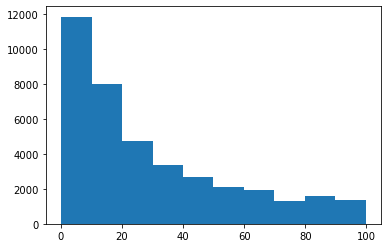

In [10]:
import matplotlib.pyplot as plt


mask = df_tweets.bot_proba.astype(float) > 0
df_probas = df_tweets[mask]
plt.hist(df_probas.bot_proba)

In [11]:
What percentage of our data were bots?


Object `bots` not found.


In [ ]:
What percentage of our data were bots

What percentage of our data were bots

In [12]:
mask = df_tweets.bot_proba > .5
bots = list(df_tweets[mask].username.unique())
not_bots = list(df_tweets[~mask].username.unique())

bot_perc = len(bots) / (len(not_bots) + len(bots))
bot_perc

0.06645680792840766

In [26]:
df_tweets.bot_proba.value_counts()

11.76    133
14.15     86
90.88     80
33.61     77
26.38     66
        ... 
14.19      1
73.30      1
78.20      1
15.90      1
64.34      1
Name: bot_proba, Length: 5948, dtype: int64

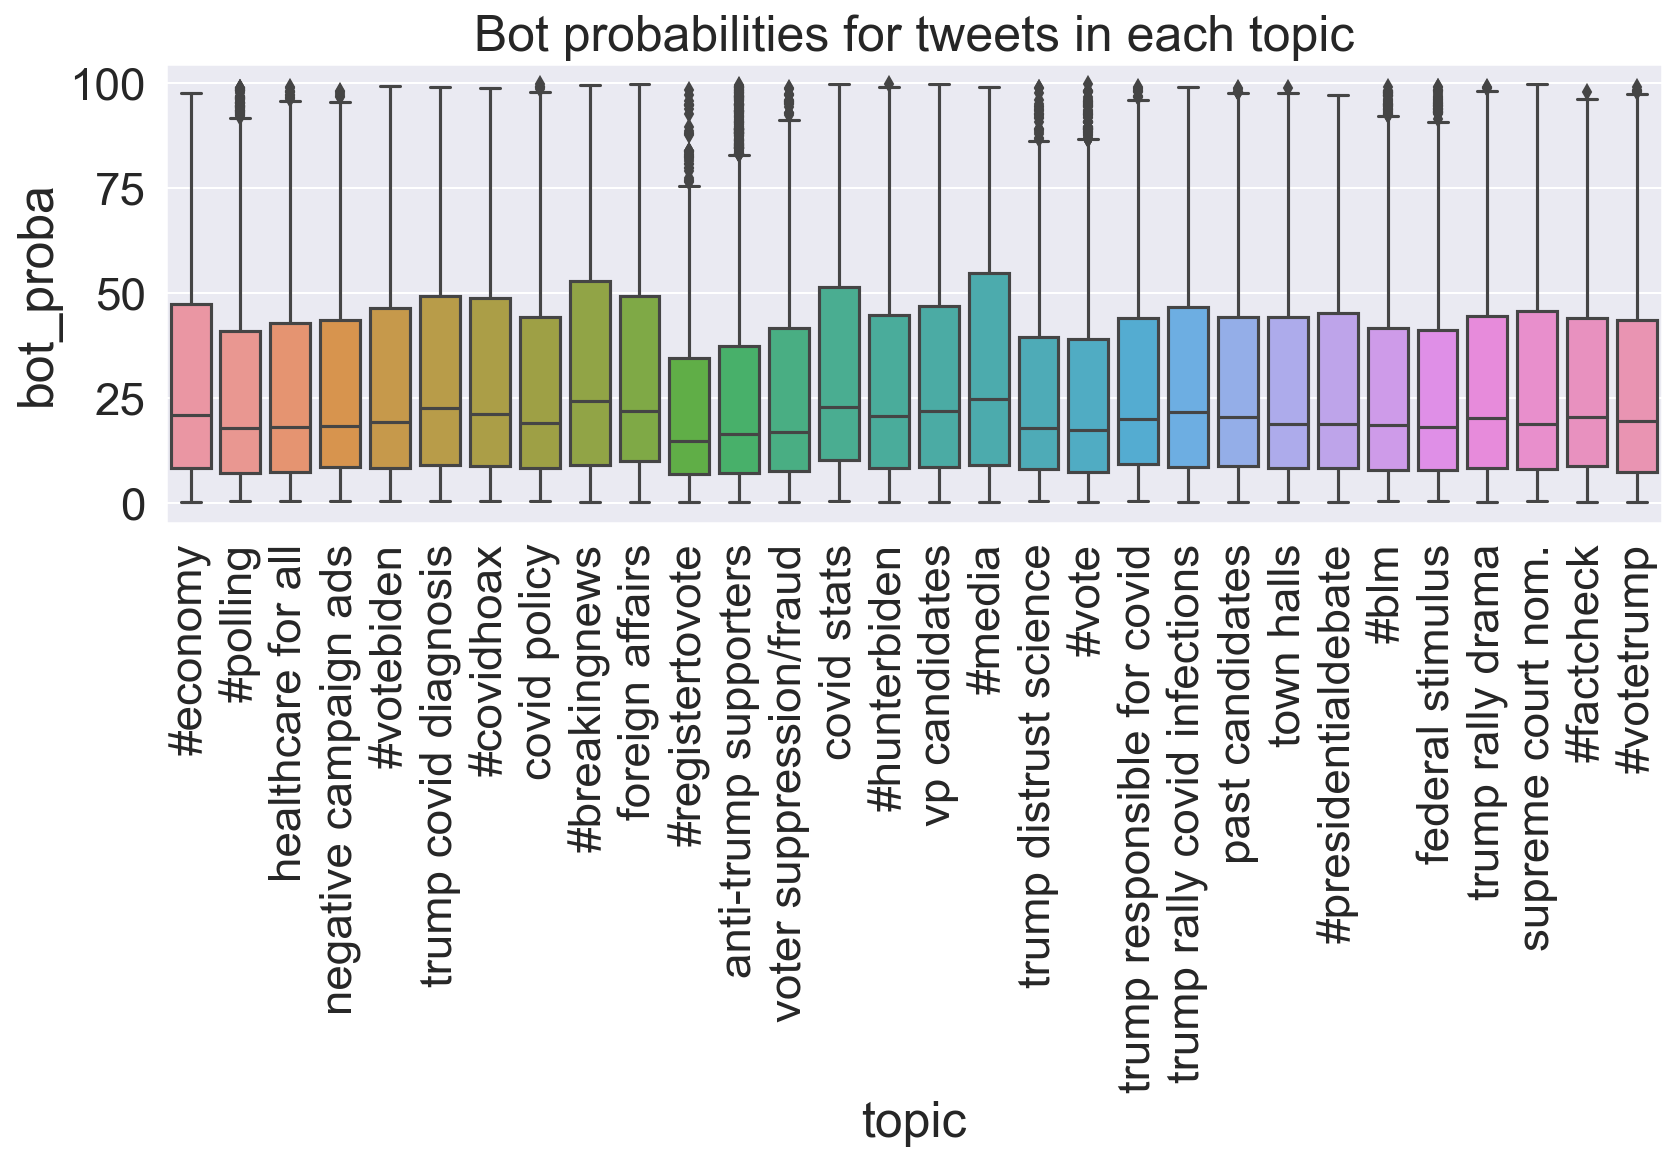

In [13]:
import seaborn as sns

# col_order = [
#     'covid_stats',
#     'foreign_affairs',
#     'covid_restrictions',
#     'vp_candidates',
#     'negative_campaign_ads',
#     'trump_covid_rally',
#     'debate',
#     'past_candidates',
#     'truth_and_lies',
#     'hunter_biden',
#     'racism',
#     'pro_vote',
#     'polls',
# ]
sns.set(font_scale=2,rc={'figure.figsize':(11.7,8.27), 'figure.dpi':150})
ax = sns.boxplot(x='topic', y="bot_proba", data=df_tweets[['topic', 'bot_proba']])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Bot probabilities for tweets in each topic")

plt.tight_layout()
plt.savefig("../etc/bot_probas_all.png")


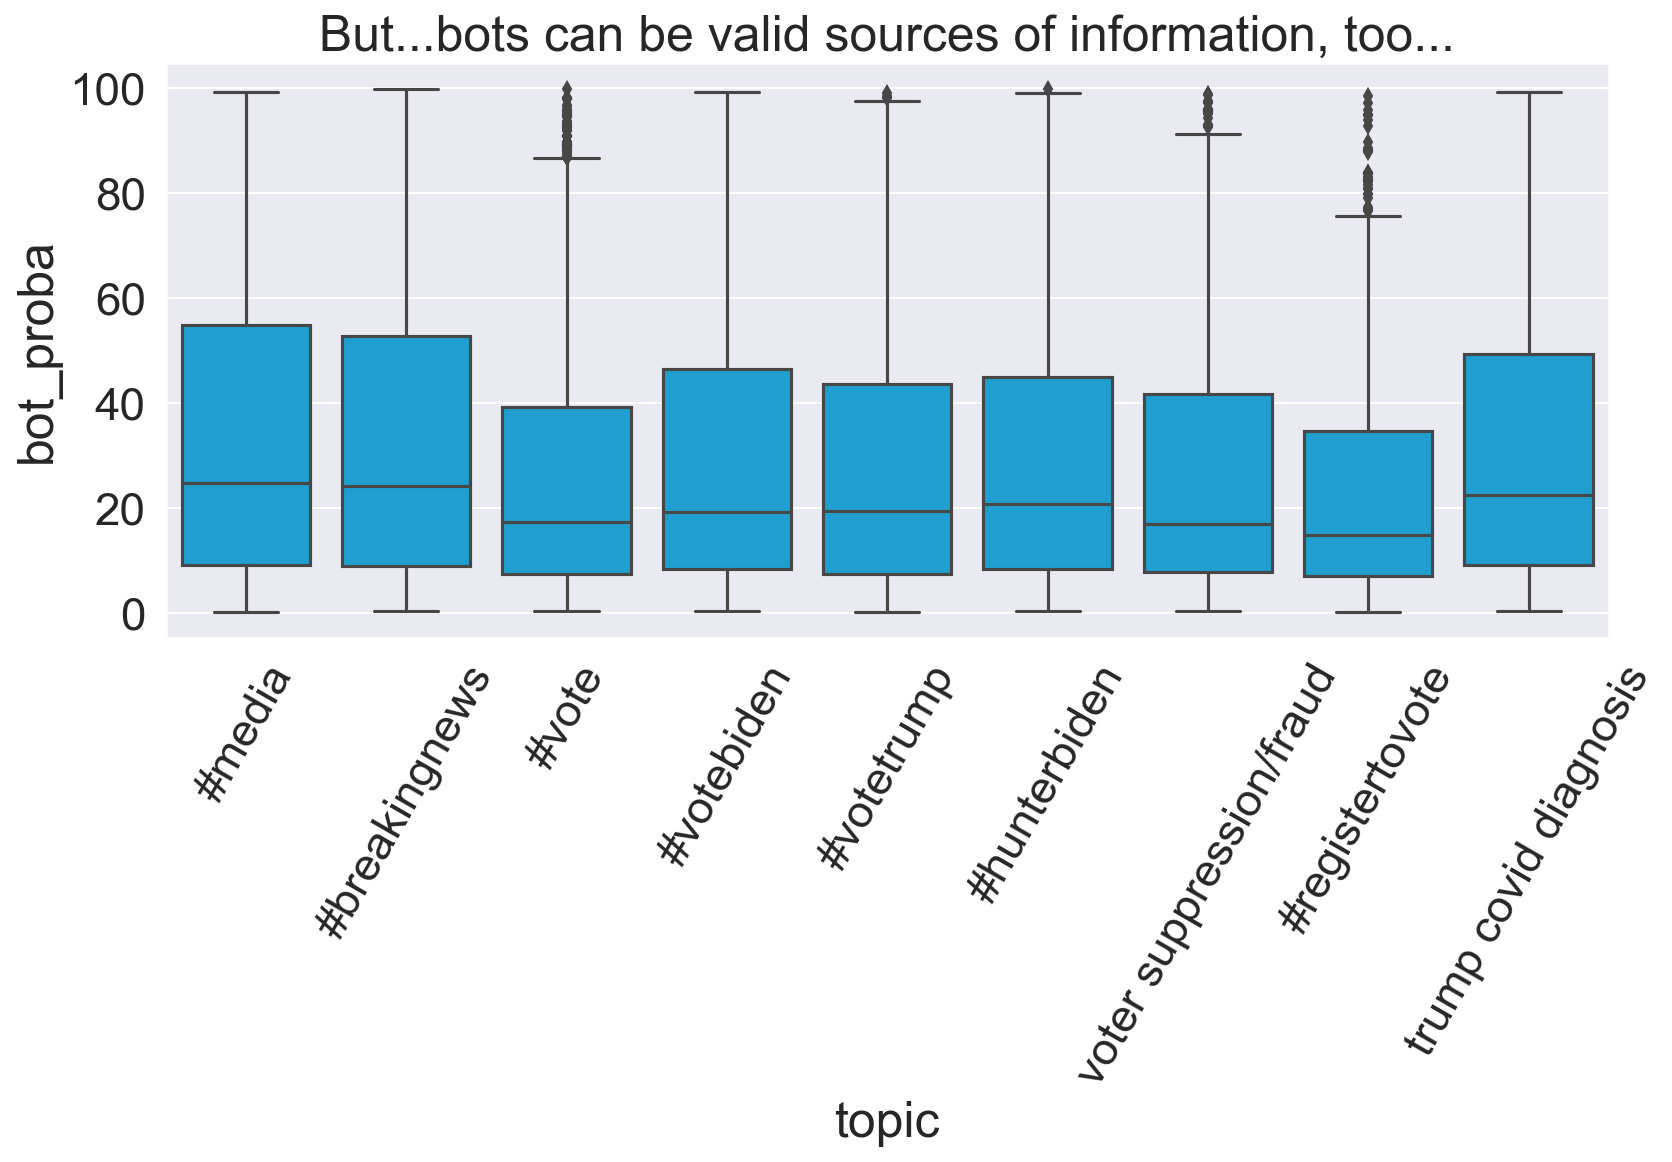

In [14]:
cols = [
    '#media',
    '#breakingnews',
    '#vote',
    '#votebiden',
    '#votetrump',
    '#hunterbiden',
    'voter suppression/fraud',
    '#registertovote',
    'trump covid diagnosis'
]
mask = df_tweets['topic'].isin(cols)
sns.set(font_scale=2,rc={'figure.figsize':(11.7,8.27), 'figure.dpi':150})
ax = sns.boxplot(x='topic', y="bot_proba", data=df_tweets[mask][['topic', 'bot_proba']], color='#00ACEE', order=cols)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
ax.set_title("But...bots can be valid sources of information, too...")

plt.tight_layout()
plt.savefig("../etc/bot_probas_subset.png")

In [15]:
df_tweets.drop(columns='time', inplace=True, errors='ignore')
df_tweets.sort_values(by='date', ascending=True, inplace=True)
mask = df_tweets.bot_proba > 0
df_tweets[mask].date.value_counts().sort_index()

2020-10-01     5357
2020-10-02     2866
2020-10-03      661
2020-10-04      702
2020-10-05      682
2020-10-06      710
2020-10-07      773
2020-10-08      758
2020-10-09      718
2020-10-10      701
2020-10-11      597
2020-10-12      720
2020-10-13      754
2020-10-14      681
2020-10-15      834
2020-10-16      664
2020-10-17      540
2020-10-18      700
2020-10-19      707
2020-10-20      528
2020-10-21      766
2020-10-22      666
2020-10-23      664
2020-10-24      733
2020-10-25      434
2020-10-26      499
2020-10-27      839
2020-10-28      460
2020-10-29      776
2020-10-30      850
2020-10-31      427
2020-11-01      668
2020-11-02    10406
Name: date, dtype: int64

In [16]:
# fig, ax = plt.subplots()

# for key, grp in df_tweets.groupby(['topic']):
#     ax = grp.plot(ax=ax, kind='line', x='date', y='bot_proba', label=key)

# plt.legend(loc='best')
# plt.show()

In [17]:
df_tweets.groupby('topic').agg('count')

,id,date,user_id,username,hashtags,trump,biden,original,tweet,num_tokens,tweet_topic,bot_proba,verified
topic,,,,,,,,,,,,,
#blm,12400,12400,12400,12400,12400,12400,12400,12400,12400,12400,12400,1216,1216
#breakingnews,10107,10107,10107,10107,10107,10107,10107,10107,10107,10107,10107,1195,1195
#covidhoax,17061,17061,17061,17061,17061,17061,17061,17061,17061,17061,17061,1795,1795
#economy,11790,11790,11790,11790,11790,11790,11790,11790,11790,11790,11790,1073,1073
#factcheck,10328,10328,10328,10328,10328,10328,10328,10328,10328,10328,10328,1108,1108
#hunterbiden,15507,15507,15507,15507,15507,15507,15507,15507,15507,15507,15507,1775,1775
#media,6136,6136,6136,6136,6136,6136,6136,6136,6136,6136,6136,817,817
#polling,16431,16431,16431,16431,16431,16431,16431,16431,16431,16431,16431,2135,2135
#presidentialdebate,9213,9213,9213,9213,9213,9213,9213,9213,9213,9213,9213,806,806


In [18]:
mask = df_tweets.bot_proba.isna()
df_tweets[~mask].shape

(38841, 14)

In [19]:
# in case need to scrape more users bot/not

# mask = df_tweets.topic == 'hunter_biden'
# grab_users = list(df_tweets[mask].user_id.unique())

# already_have = np.array(df_users.user_id.unique())
# remaining = [u for u in grab_users if u not in already_have]
# pd.Series(remaining).to_pickle("pickle/grab_users.pick")

In [20]:
df_tweets.to_csv("../data/election_tweets.csv")

In [21]:
df_tweets['bots_per_topic_day'] = ((df_tweets.groupby(['date', 'topic'], as_index=False).agg({'bot_proba':'sum'})).bot_proba)
df_tweets

,id,date,user_id,username,hashtags,trump,biden,original,tweet,num_tokens,tweet_topic,topic,bot_proba,verified,bots_per_topic_day
345443,1311809936029036544,2020-10-01,1143289465387081732,theb1ackdaria,[],False,True,"i didn't know biden overcame a stuttering problem. it puts things in perspective and makes a lot of critique about him ""rambling"" (my own included) seem terribly ableist in hindsight",hindsight joebiden perspective thing seem terribly critique rambling put included stuttering make,12,23,#factcheck,10.66,False,NaN
61459,1311817244985364480,2020-10-01,782603330,truromanticlife,[],True,False,Trump wants to know how fast U.S. nukes can be loaded onto launchers if arms treaty expires. Donald Trump is a DANGER to the entire world. He has done nothing but destabilize countries and make the world LESS SAFE. https://t.co/2pTwG2wdQ0,fast arm country safe destabilize launcher loaded danger treaty onto world want donaldtrump,13,26,#votetrump,68.19,False,NaN
61457,1311817245455192065,2020-10-01,65644824,joedanmedia,[],True,True,"If I were @realDonaldTrump and we're ALL glad I'm not. lol NEXT debate, before the first question, I would demand Biden and the Moderators denounce White Supremacy. Then again mid-way through. And once again at the end. TRUMP 2020",glad debate joebiden midway donaldtrump question denounce whitesupremacy moderator end demand,11,15,supreme court nom.,NaN,NaN,NaN
61455,1311817246478483456,2020-10-01,1266619663795904513,realmairaw,[],True,True,"@jesuisfe @KLoamax @CNNPolitics I’m not assuming, he did. I know it’s a middle school argument, but it did set the precedent for what was to come. Biden laughed and smiled insidiously while the potus was talking, even before trump started with the childish shit. Rewatch the debate.",childish joebiden assuming debate precedent talking set school insidiously argument middle donaldtrump,12,5,#presidentialdebate,NaN,NaN,NaN
61453,1311817247057489920,2020-10-01,777679662310907904,swainelynn,[],True,False,"@bdomenech @realDonaldTrump what he said was ""that Trump ""bears the primary responsibility for what happened"" that night."" which is true, I watched it. Guessing you are not good with comprehension.",bear primary guessing true comprehension watched responsibility donaldtrump,8,23,#factcheck,34.31,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889301,1323408368229326848,2020-11-02,1212662806119473159,timedwardszero4,[],True,True,"Only 6 major US newspapers have endorsed Trump for reelection - Business Insider Meanwhile, more than 40 news outlets have endorsed Democratic presidential nominee Joe Biden. https://t.co/J4L3hrDTdY",joebiden u outlet endorsed meanwhile business democraticpresidentialnominee newspaper news insider major donaldtrump,12,29,#breakingnews,NaN,NaN,NaN
889303,1323408367591849985,2020-11-02,4396337007,771klcraddoc,[],True,False,40% of the millennials can’t afford to pay a $400 emergency expense. Yet Trump keeps telling his base that the economy is at an all time high &amp; they believe him,base afford believe high keep emergency economy pay expense donaldtrump,10,19,trump distrust science,NaN,NaN,NaN
889304,1323408367428067328,2020-11-02,808060555,darkenrahl86,[],True,False,"@FrancaRose33 @yammerapple @garner_forest @kittyst0mper @Tampke @badjin_rank @CoxsTench @extremecompute @FlynDutchman466 @theHazelverse @Peaches_Sabrina @rincewind_t @it_is_me_GH @RomanthaAries @mikeinmarlton @kristenschaaled @TheJeffBradley @insaneknight85 NC by 1 point. WI by 2 MI by 2-3 The opposite is also likely true, Trump wins by a couple points in the states that are close.",win point couple wi true close state opposite donaldtrump,9,21,#polling,11.73,False,NaN
889267,1323408376605286401,2020-11-02,181661077,alexandraberzon,[],True,False,"Jon Ralston on Trump's chances in Nevada: As I have been consistently saying, he has a path, but it is as fantastic as the yellow brick road and about as phony as Oz. Worth reading the whole analysis though. 

In [22]:
# for topic in topic_names:
#     mask = df_tweets.topic==topic
#     X = df_tweets[mask].date
#     y = df_tweets[mask][['date', 'bot_proba']].groupby('date').agg('mean')
#     plt.plot(X, y, label=topic)

In [23]:
# import matplotlib.pyplot as plt
# # line 1 points
# x1 = [10,20,30]
# y1 = [20,40,10]
# # plotting the line 1 points 
# plt.plot(x1, y1, label = "line 1")
# # line 2 points
# x2 = [10,20,30]
# y2 = [40,10,30]
# # plotting the line 2 points 
# plt.plot(x2, y2, label = "line 2")
# plt.xlabel('x - axis')
# # Set the y axis label of the current axis.
# plt.ylabel('y - axis')
# # Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# # show a legend on the plot
# plt.legend()
# # Display a figure.
# plt.show()